In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab  import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds,_=default()
gc = gspread.authorize(creds)

In [ ]:
worksheet =  gc.open('data').sheet1

In [ ]:
data = worksheet.get_all_values()

In [ ]:
df=pd.DataFrame(data[1:], columns=data[0])
df=df.astype({'X':'int'})
df=df.astype({'Y':'int'})
df.head()

,X,Y
0,1,12
1,2,22
2,3,32
3,4,42
4,5,52


In [ ]:
X = df[['X']].values
Y = df[['Y']].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=33)

In [ ]:
Scaler = MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
ai_brain = Sequential([
    Dense(8,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer= 'rmsprop',loss = 'mse')

In [ ]:
ai_brain.fit(X_train1,Y_train,epochs= 2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13199.1914
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13196.1025
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13193.9834
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13192.1875
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 13190.5820
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13189.0986
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13187.7012
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13186.3682
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13185.0791
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13183.8369
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13182.6201
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13181.4277
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13180.2549
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13179.0986
Epoch 15/2000
1/1

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

Jeevitha


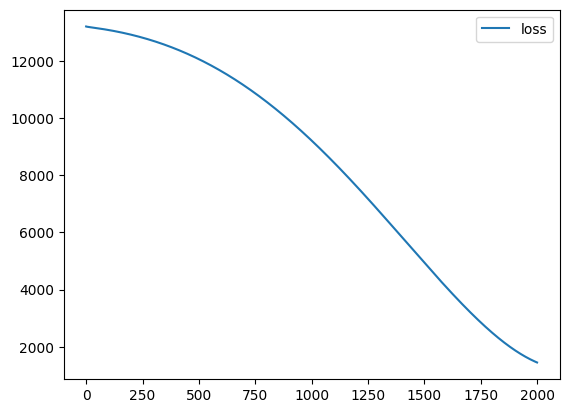

In [ ]:
# E.Jeevitha
212222230054
loss_df.plot()


In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
ai_brain.evaluate(X_test1,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 13360.9404


13360.9404296875

In [ ]:
X_n1 = [[7]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1 )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[83.26811]], dtype=float32)